# PH2150: Scientific Computing Skills - Report Problem Sheet 10

## Purpose of the Notebook
This notebook explores Fourier series, focusing on approximating periodic functions using Python. It includes a scriptm where Fourier series are explired using `ipywidgets` to visualise and manipulate data in several ways, and a report exploring both the theory behins this concept and explaining how the code works.


<IPython.core.display.Javascript object>


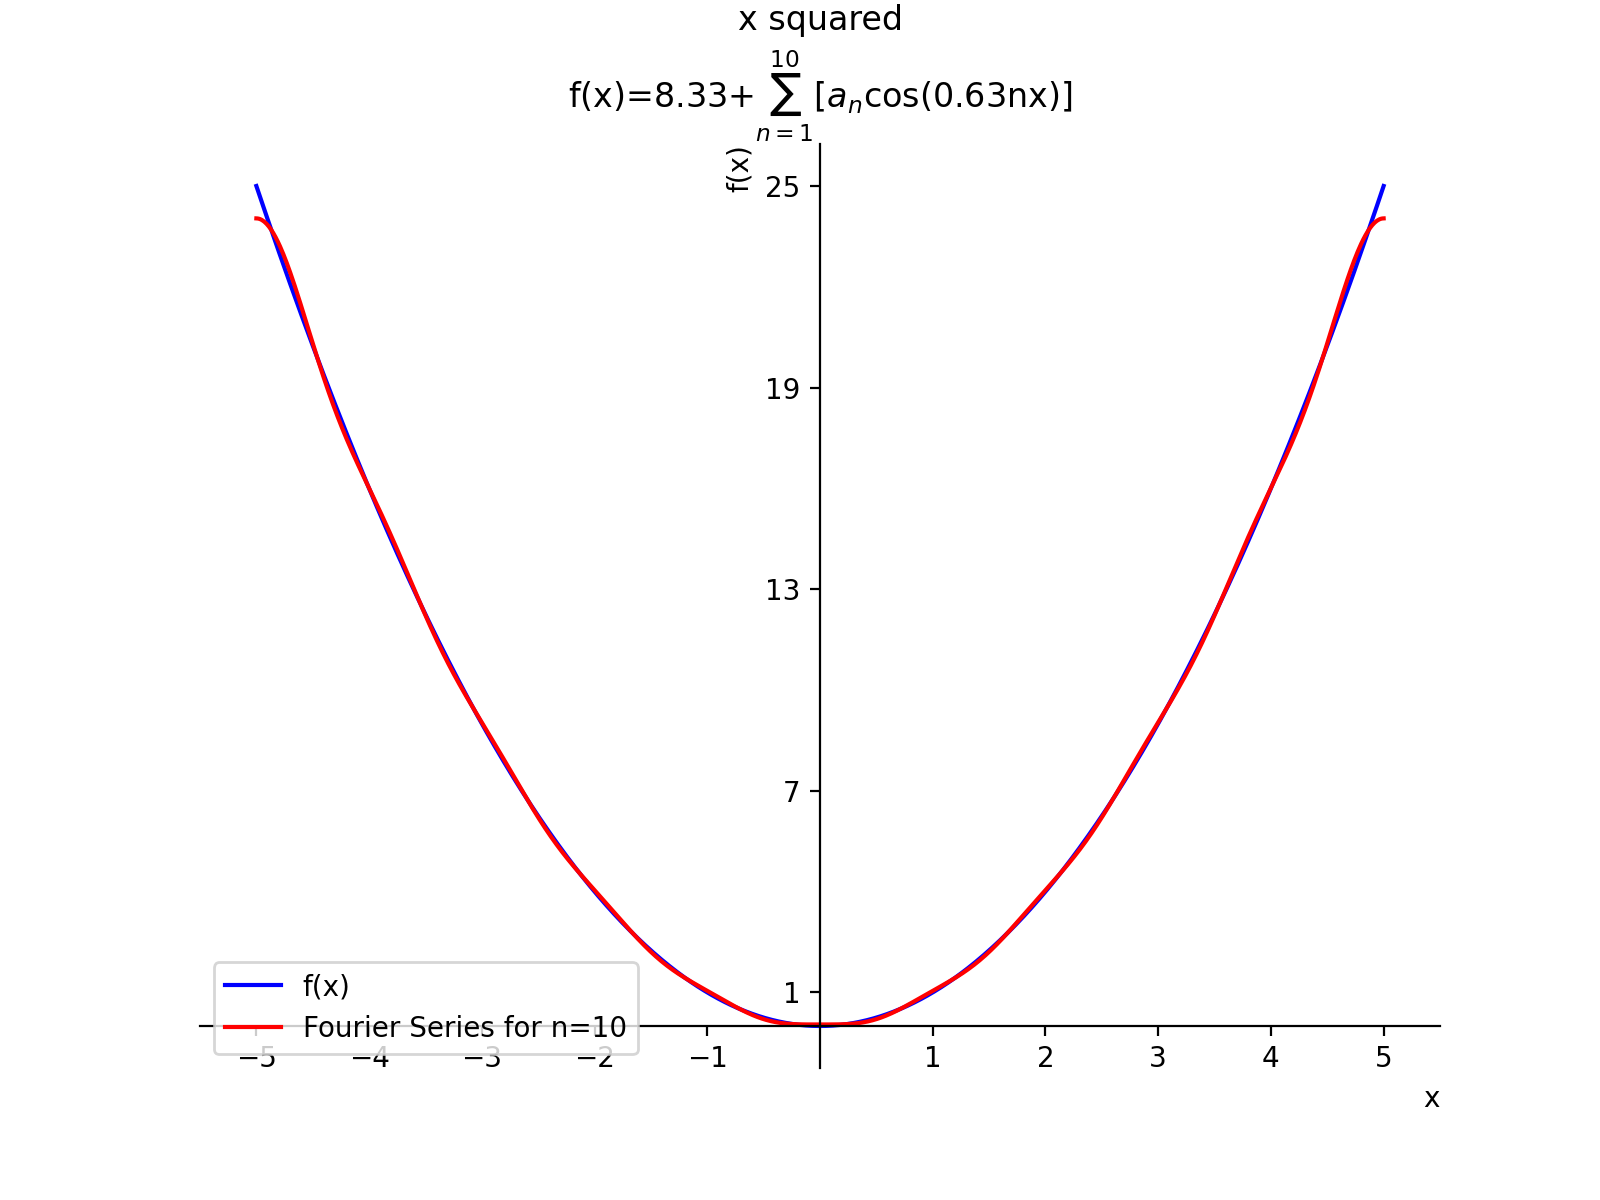

interactive(children=(ToggleButtons(button_style='success', description='Which function do you want to see?', …

<function __main__.update(Type='Square Wave', n=10, Period=10, Color_series='red', Color_function='blue', Coefficients=False)>

In [3]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from __future__ import division,print_function
import ipywidgets as widgets
from scipy.integrate import quad


fig1 = plt.figure(figsize=(8,6))  # I open a figure, where I will have the subplot.
ax1  = fig1.add_subplot()         # I create a subplot within the figure. I will have the graphs here.

def update(Type='Square Wave', n=10,  Period=10, Color_series='red', Color_function='blue', Coefficients=False):
    """
    This defined function is the one that I will use in the main widgets.interact() later.
    It takes as parameters: 
    The f(x):'Square Wave', 'Sawtooth Wave', 'Triangle Wave', 'Pulse wave' or 'x squared'('Square Wave' by default)
    The n to use in the Fourier Series: Integer between 1 and 50 (10 by default)
    The period of f(x): Number between 2 and 10, if larger not even 1 interval would be seen (10 by default)
    The series graph color: Red, Blue, Green, Yellow, Orange, Pink, Purple, Brown, Black or Gray ('Red' by default)
    The function graph color: The same color options than above ('Blue' by default)
    Whether the first coefficients will be showed (user can also choose how many): True or False (False by default)
    With these parameters, it defines f(x), calculates a_0, then a_n and b_n for all the n, adding all up using
    the Fourier series formulas, so in the end it has the necessary values for the graph. Then, it plots both the
    function and the Fourier series using the chosen colors with the Fourier Series formula in top of it, removing 
    the values that are 0, and finally it prints the first coefficients if chosen so and uses another defined 
    function and widgets.interact() to chose how many first coefficients.
    """
    L = Period # I define Period as L only to make it easier to use later, because it is shorter.
    
    if Type == 'Square Wave':   # If I need to plot a square wave, define f(x) as:
        def f_x(x):
            "Value of f(x) of a square wave on its period."
            if x >= 0:                                                  # f(x) = 1, if x>=0
                return 1
            else:                                                       # f(x) = -1, if x<0
                return -1
    if Type == 'Sawtooth Wave': # If I need to plot a sawtooth wave, define f(x) as:
        f_x = lambda x: x                                               # f(x) = x
    if Type == 'Triangle Wave': # If I need to plot a triangle wave, define f(x) as:
        def f_x(x):
            "Value of f(x) of a triangle wave on its period."
            if x >= 0:                                                  # f(x) = -x+L/2, if x>=0
                return -x + L/2
            else:                                                       # f(x) =  x+L/2, if x<0
                return  x + L/2
    if Type == 'Pulse Wave':    # If I need to plot a pulse wave, define f(x) as:
        def f_x(x):
            "Value of f(x) of a pulse wave on its period."
            if abs(x) < L/6:                                            # f(x)=1, if absolute value of x < period/6
                return 1
            else:                                                       # f(x)=0, if absolute value of x >= period/6
                return 0
    if Type == 'x squared':     # If I need to plot an x squared function, define f(x) as:
        f_x = lambda x: x**2                                            # f(x) =  x^2
    # Now, I have f(x) defined on its period.
    
    x = np.linspace(-5, 5, 1000) # x is an array with 1000 numbers between -5 and 5 equally spaced.
    
    y_function = [] # This list is originally empty but it will end up having the necessary y values to plot f(x).
    for each_x in x: # For each of the 1000 values in x:
        while abs(each_x) > L/2:  # If it is larger than L/2: reduce its abslute value by L until it stops being so.
            if each_x > 0:           # If it is positive, it is done by subtracting L.
                each_x -= L
            elif each_x < 0:         # If it is negative, it is done by adding L.
                each_x += L
        # After this loop, the absolute values that will arrive here will be smaller than L/2 (within the interval).
        # For each one of these values, calculate f(x) and add it to y_function, so it will have the necessary y 
        # values to plot f(x) repeated on the interval [-L/2, L/2].
        each_y =f_x(each_x)
        y_function.append(each_y)
        
     # I will now calculate a_0, which is a constant because it is independent of n:
    integral_a0, error_a0 = quad(f_x, -L/2, L/2) # integral_a0 is the integral of f(x) between -L/2 and L/2.
    a_0 = 2/L * integral_a0  # a_0 = 2/L * integral of f(x) between -L/2 and L/2.
        
    def function_a(x, n):
        "This defined function is what has to be integrated to get a_n: f(x) * cos(2πnx/L)"
        return f_x(x) * np.cos(2*np.pi*n*x/L)
    
    def function_b(x, n):
        "This defined function is what has to be integrated to get b_n: f(x) * sin(2πnx/L)"
        return f_x(x) * np.sin(2*np.pi*n*x/L)
    
    # y_series has originally 1000 zeros (these zeros will increase in the loop to be the y values for the series).
    y_series = np.zeros(1000)
    all_an = [] # In this lists I will add all the a_n coefficients.
    all_bn = [] # In this lists I will add all the b_n coefficients.
    for m in range(n):           # For all the numbers between 0 and n-1:
        m +=1 #This changes it to: For all the numbers between 1 and n, which is what I need for the Fourier Series:

        integral_a, error_a = quad(function_a, -L/2, L/2, args=(m)) # integral of f(x)*cos() between -L/2 and L/2.
        a_n = 2/L * integral_a # a_n = 2/L * integral of f(x)*cos() between -L/2 and L/2.
        all_an.append(a_n) # I add each a_n to all_an

        integral_b, error_b = quad(function_b, -L/2, L/2, args=(m)) # integral of f(x)*sin() between -L/2 and L/2.
        b_n = 2/L * integral_b # b_n = 2/L * integral of f(x)*sin() between -L/2 and L/2.
        all_bn.append(b_n) # I add each b_n to all_bn
        
        # value is what has to be added for each n according to the Fourier series formula: [a_n*cos()+b_n*sin()]
        value = a_n * np.cos(2*np.pi*m*x/L) + b_n * np.sin(2*np.pi*m*x/L)
        # value is an array with 1000 numbers, because it is using x, which is as well.
        y_series += value # I add value to y_series, because they are both arrays with 1000 numbers.
    # After this loop, y_series is an array with 1000 numbers which are no longer zero, but the summation in the 
    # Fourier series formula up to the given n for the 1000 values in x.
    y_series += a_0/2 # I add a_0/2 to the 1000 numbers in y_series following the formula of Fourier series.
        
    # I clear the axis ax1, to avoid that when an interactive paramter is changed the prior graph is still there:
    ax1.clear()
    # I plot x against y_function (the function itself) using the chosen color:
    ax1.plot(x, y_function, label = 'f(x)', color=Color_function)
    # I plot x against y_series (the Fourier series) using the chosen n as label and the chosen color:
    ax1.plot(x, y_series, label = "Fourier Series for n="+str(n), color=Color_series)    
    # Now, I will create a variable named Function which has the Fourier series formula for each case:
    term_1 = str(round(a_0/2, 2)) # This is just what is before the summation symbol round to 2 decimals.
    cos_fun = "cos("+str(round(2*np.pi/L,2))+"nx)" # This is cos(2πnx/L) with 2π/L as its value round to 2 decimals.
    sin_fun = "sin("+str(round(2*np.pi/L,2))+"nx)" # This is sin(2πnx/L) with 2π/L as its value round to 2 decimals.
    # The variable bracket is what will appear between the square brackets [] in the Fourier series formula. It is
    # originally empty because if f(x) is even or odd, then a_n or b_n is zero, so I will make sure that a zero
    # will not appear like: 0 + ... or ... + 0.
    bracket = ''
    if abs(sorted(all_an)[-1]) > 0.01: # If the largest a_n is larger than 0.01 (is not zero): a_n is not always 0.
        bracket += "$a_n$"+ cos_fun        # Since a_n is not always 0, add a_n cos() to the bracket
    if abs(sorted(all_bn)[-1]) > 0.01: # If the largest b_n is larger than 0.01 (is not zero): b_n is not always 0.
        bracket += "$b_n$"+ sin_fun        #Since b_n is not always 0, add b_n sin() to the bracket
    if a_0 > 0.01: # If a_0 is not 0 (or very small, which is actually zero):
        # I define function as the following, using the Fourier series formula:
        Function='f(x)='+term_1+r'$+ \sum^{{{}}}_{{n=1}}$'.format(n)+"["+bracket+']'
        # I use r at the beginning and three {} to be able to left it blank and add n after using .format(n)
    else: # If a_0 is 0 (or very small, which is actually zero):
        # Define Function as above, but not including the first term, because that would be: 0 + ...
        Function=r'$f(x)=\sum^{{{}}}_{{n=1}}$'.format(n)+"["+bracket+']'
    ax1.set_title(Type+'\n'+Function) # Title: Type (e.g. Square wave), newline, Function defined above.
    # I would have liked to change the constants a_n and b_n in the title by its values (e.g. 4/πn), but since I am
    # not entering manually these coefficients, but calculating them in the code, it would be very difficult to 
    # calculate the formula of their actual values. Instead, I give the option of printing the first coefficients
    # if the user wants to.
    ax1.spines['left'].set_position('zero')  # I set the left axis to go the the middle (x=0)
    ax1.spines['right'].set_color('none')    # I set the right axis to dissapear (so there is only 1 vertical axis)
    ax1.spines['bottom'].set_position('zero')# I set the bottom axis to go to y=0
    ax1.spines['top'].set_color('none')      # I set the top axis to dissapear (so there is only 1 horizontal axis)
    ax1.set_xlabel('x', loc='right')  # I label the x axis as x, setting it to be in the right.
    ax1.set_ylabel('f(x)', loc='top') # I label the y axis as f(x), setting it to be in the top.
    # I set that the x ticks are all the integers between -5 and 5 except 0 (since it looks weird with the x axis):
    ax1.set_xticks([-5,-4,-3,-2,-1,1,2,3,4,5])
    # Now, to set the y ticks I will use if statements because they are different depending on the graph type.
    maximum = round(sorted(y_function)[-1],0)   # I get the higher y value of f(x) with sorted() round to 0 decimals.
    if Type == 'Square Wave':   # If I need to plot a square wave:
        ax1.set_yticks([-1, 1])      # The y ticks are only -1 and 1 (the amplitude does not depend on the period).
    if Type == 'Sawtooth Wave': # If I need to plot a sawtooth wave:
        positive_ticks = np.arange(1,maximum+1,1)     # All integers between 1 and maximum (+1 to include maximum).
        all_ticks = list(positive_ticks) + list(positive_ticks*-1)   # I made them lists to be able to add them up.
        ax1.set_yticks(all_ticks)   # The y ticks I will use are both positive_ticks and the negative same numbers.
    if Type == 'Triangle Wave': # If I need to plot a triangle wave:
        positive_ticks = np.arange(1,maximum+1,1)
        ax1.set_yticks(positive_ticks)                       # I use all integers between 1 and maximum as y ticks.
    if Type == 'Pulse Wave':    # If I need to plot a square wave:
        ax1.set_yticks([1])                   # The y tick is only 1 (the amplitude does not depend on the period).
    if Type == 'x squared':     # If I need to plot a pulse wave:
        positive_ticks = np.arange(1,maximum+1,1)     # I create this list with all integers between 1 and maximum.
        if maximum >= 5:           # If the maximum is 5 or more:
            steps = int((maximum-1)/4)           # Steps will be (maximum-1)/4, which will be 6 for 25 and 1 for 5.
        else:                      # If the maximum is less than 5:
            steps = 1                                                                    # Steps will be only of 1.
        ax1.set_yticks(positive_ticks[::steps])         # I use as y ticks the values of positive_ticks each steps.
    ax1.legend() # To show the label.
    
    if Coefficients == False: # If Coefficients (show the first coefficients) is False: print "".
        print("") # I print "" instead of doing nothing to ensure that when the box is unchecked, there is nothing.
    else: # If Coefficients (show the first coefficients) is True:
        # I use a new widgets: a slider that acts on a function defined with decorater: @ and it is below.
        @widgets.interact(quantity = widgets.IntSlider( # The variable quantity is chosen with an IntSlider.
            value=1,min=1, max=10, setp=1, # The slider can take the integers betwen 1 and 10 with 1 by default.
            description = "Quantity", # The description is short, but I expand it in the tooltip.
            tooltip='How many first coefficients do you want to see?'))  
        def print_message(quantity = 1):
            """
            This defined function is created to be used in the above widgets.interact() by means of decorater: @.
            It takes as parameter quantity, which is how many first coefficients the user wants to see.
            Depending on whether there are enough coefficients defined and on if 1 or more coefficients are wanted,
            it then prints a different message."""
            if quantity > n: # If the user wants more first coefficients than coefficients defined:
                print("Not enough quantity of n.") # Print that there are not enough coefficients.
            else:            # If there are enough coefficients:
                if quantity == 1: # If only the first coefficients are wanted: 
                    # The messages have only 1 value (round to 2 decimals to avoid long numbers and approximato to
                    # zero) and the verb is "is".
                    message_a = "The first value of a_n is:"+str(round(all_an[0],2))
                    message_b = "The first value of b_n is:"+str(round(all_bn[0],2))
                else:             # If more than only the first coefficients are wanted:
                    # The messages will start with only one value and more will be added with a loop, and the verb 
                    # is "are".
                    message_a = "The first "+str(quantity)+" values of a_n are: "+str(round(all_an[0],2))
                    message_b = "The first "+str(quantity)+" values of b_n are: "+str(round(all_bn[0],2))
                    # In the following loop I want to add the remaining values (because the first one is already 
                    # there). So, if n=5, I want to add the second, third, fourth and fifth coefficients, so I need
                    # the indices 1, 2, 3 and 4. To get such indices, I start with a loop in range(quantity-1), 
                    # to have the necessary amount of loops, and then I add 1 to i to start from index 1 (second 
                    # coefficient). So i will be my necessary indices.
                    for i in range(quantity-1):
                        i += 1
                        # I add to both messages a new value each loop, adding also a comma before (I add it before
                        # to avoid ending the message with a comma).
                        message_a = message_a + ", " + str(round(all_an[i],2))
                        message_b = message_b + ", " + str(round(all_bn[i],2))
                # After all this code, the necessary message_a and message_b are created, so I just print both.
                print(message_a+'\n'+message_b)
                
    


# Now I will create the interactive graph using widgets.interact() with update:
widgets.interact(update,                  
                 Type = widgets.ToggleButtons(      # Type will be chosen by the user with ToggleButtons:
                     options=['Square Wave','Sawtooth Wave','Triangle Wave','Pulse Wave','x squared'], # The 5 f(x).
                     button_style = 'success',                    # Style of success, which makes the buttons green.
                     description='Which function do you want to see?'),                      # Question to the user.
                 n = widgets.IntSlider(             # n will be also chosen with IntSlider:
                     value=10, min=1, max=50, step=1,          # Integer between 1 and 50, with 10 as defualt value.
                     description='Quantity of n',        # Sentece for the user to choose at the left of the slider.
                     tooltip='Up to which n should the Fourier series go?'),          # Tooltip for the description.
                 Period = widgets.FloatSlider(      # Period of the function will be also chosen with FloatSlider:
                     value=10, min=2, max=10, step=0.2, # Number between 2 and 10 with steps of 0.2 (10 by default).
                     description='Period of f(x)',       # Sentece for the user to choose at the left of the slider.
                     tooltip='Which period do you want for the function f(x)?'),      # Tooltip for the description.
                 Color_series = widgets.Dropdown(   # Color of the Fourier series will be also chosen with Dropdown:
                     options=['Red','Blue','Green','Yellow','Orange','Pink','Purple','Brown','Black','Gray'],
                     value='Red',                      # Between the 10 available options, the default value is red.
                     description='Color of FS'),       # Sentece for the user to choose at the left of the dropdown.
                 Color_function = widgets.Dropdown( # Color of the function will be also chosen with Dropdown:
                     options=['Red','Blue','Green','Yellow','Orange','Pink','Purple','Brown','Black','Gray'],
                     value='Blue',                    # Between the 10 available options, the default value is blue.
                     description='Color of f(x)'),     # Sentece for the user to choose at the left of the dropdown.
                 Coefficients = widgets.Checkbox(   # It is chosen whether the first coefficients are printed.
                     value=False,                                       # Default value False, so do not print them.
                     description='See the first coefficients.')                   #  Sentece for the user to choose.
                )


# Report - Fourier series
# Sebastian Acuy

## 1. Introduction

In this report, I will describe the mathematical theory behind the Fourier series in *Section 2* and explain how the code done by me above in this Jupyter notebook works and how it can help in the explanation of the Fourier series and some of its features in *Section 3*.

## 2. Mathematical concept of the Fourier series
### 2.1 Inner product 

The inner product of any two functions f(x) and g(x) is:  

$\begin{equation}
\langle f,g\rangle = \displaystyle\int_{a}^{b} f^*(x)g(x)\omega(x)dx
\tag{1}
\end{equation}$

where $\omega(x)$ is the weight function [<span style="color:blue">1</span>].

So, the inner product between sin(x) and cos(x) between -$\pi$ and $\pi$ with weight function equal to 1 is: 
$\begin{equation}
\langle sin(x),cos(x)\rangle = \displaystyle\int_{-\pi}^{\pi} sin(x)cos(x)1dx = \left[\frac{-cos^2(x)}{2}\right]^\pi_{-\pi} = -\frac{1}{2}-\left(-\frac{1}{2}\right) = -\frac{1}{2} + \frac{1}{2} = 0
\tag{2}
\end{equation}$

Since the inner product is a generalization of the dot product, we can then see that sin(x) and cos(x) form an orthogonal set on the interval [$-\pi, \pi$]. And the orthogonality of these two functions is one of the keys of the Fourier series [<span style="color:blue">2</span>].

### 2.2 Fourier series 

A Fourier series is a way of representing periodic functions in terms of sines and cosines, and we can do it because they form a complete set of orthogonal functions over one interval.
A function f(x) can be expressed using a Fourier series if it meets the **Dirichlet conditions** [<span style="color:blue">3</span>]:
1) f(x) is periodic.
2) f(x) is single-valued and continuous, except possibly at a finite number of finite discontinuities within a period.
3) f(x) must have only a finite number of maximums and minimums within a period.
4) The integral over one period of |f(x)| must converge.

Given a function f(x) with period L that meets the Dirichlet conditions, we can approximate it as [<span style="color:blue">3</span>]:

$\begin{equation}
f(x) = \frac{a_0}{2} + \displaystyle\sum^{\infty}_{n=1} \left[a_n cos\left(\frac{2\pi nx}{L}\right) + b_n sin\left(\frac{2\pi nx}{L}\right)\right]
\tag{3}
\end{equation}$

where:

$\begin{equation}
a_0 = \frac{2}{L} \displaystyle\int_{-L/2}^{L/2} f(x) dx
\tag{4}
\end{equation}$

$\begin{equation}
a_n = \frac{2}{L} \displaystyle\int_{-L/2}^{L/2} f(x) cos\left(\frac{2\pi nx}{L}\right) dx
\tag{5}
\end{equation}$

$\begin{equation}
b_n = \frac{2}{L} \displaystyle\int_{-L/2}^{L/2} f(x) sin\left(\frac{2\pi nx}{L}\right) dx
\tag{6}
\end{equation}$




$\int_{-L/2}^{L/2} f(x) dx$ represents the total area under f(x) on the interval [-L/2, L/2], and therefore  $\frac{\int_{-L/2}^{L/2} f(x) dx}{L}$, which is equal to $\frac{a_n}{2}$, is the average value of the function, and that is why it is added at the beginning of the formula [<span style="color:blue">3</span>].

### 2.3 Even and odd functions

If we integrate an odd function (symmetric about origin: f(-x)=-f(x)) over its period, we would get 0 (because the positive parts would be cancelled out by the negative parts), and if we integrate an even function (symmetric about the y axis: f(-x)=f(x)) over its period, we would get the integral over half of the interval times 2 (because both parts have the same area), which is not zero.

*So we know that the integral of an odd function over its period is zero, but the integral of an even function is not.*

We also know that an odd function times another odd function results in an even function, that an even function times another even function results in an even function, and that an odd function times an even function results in an odd function.

Therefore, if f(x) is an even function, the multiplication between f(x) (even) and sin(2πnx/L) (odd) results in an odd function, so $b_n$ is 0. And if, on the other hand, f(x) is an odd function, the multiplication between f(x) (odd) and cos(2πnx/L) (even) results in another odd function, so both $a_0$ and $a_n$ are 0 [<span style="color:blue">3</span>].

### 2.4 Expansion to aperiodic functions

As explained before, one of the necessary conditions to be able to use the Fourier approximation is that the function f(x) is periodic. However, it can also be used to expand aperiodic functions.
To do so, we have to construct a new function $\hat{f}(x)$: we take f(x) on a period and then repeat this part outside the period, so this new function is periodic [<span style="color:blue">4</span>].

An example of such a case would be for $f(x)=x^2$, where $\hat{f}(x) = x^2$ on the interval, for example, [-1, 1], and therefore the Fourier series would represent *Figure 1*.

![x^2](https://raw.githubusercontent.com/SebAcuy/Square-wave/refs/heads/main/x%5E2_periodic.png?raw=true)
**Figure 1:** Graph of periodic function $\hat{f}(x)$ representing f(x)=$x^2$ on interval [-1, 1] made by me using Python.


### 2.5 Discontinuities in Fourier series

If there is a jump in the function, then the Fourier series will draw a vertical line at that point. This is because the Fourier approximation can only make a continuous function, so it cannot actually represent a discontinuity. Mathematically speaking, at this point the Fourier series is converging halfway between the upper and lower values of the jump.

Another characteristic feature of the Fourier series at a jump is that there is an overshoot known as the **Gibbs phenomenon**. The height of this overshoot is proportional to the size of the jump itself, and even though increasing the maximum n (adding more terms to the series) will move the overshoot closer to the discontinuity, it will never disappear [<span style="color:blue">4</span>].

An example of these two characteristic features of the Fourier series can be seen, for exmaple at x=0, in *Figure 2*.

![x^2](https://raw.githubusercontent.com/SebAcuy/Square-wave/refs/heads/main/square_wave.png?raw=true)
**Figure 2:** Graph of a square wave and its Fourier approximation on the interval [-5, 5] made by me using Python.


### 2.6 Exponential form of the Fourier series

Euler's formula states that [<span style="color:blue">1</span>]: 

$\begin{equation}
e^{i\theta} = cos(\theta)+i sin(\theta)
\tag{7}
\end{equation}$

Hence, knowing that $cos(-\theta)=cos(\theta)$ and that $sin(-\theta)=-sin(\theta)$, we can get formulas for cosine and sine:

$\begin{equation}
cos(\theta) = \frac{e^{i\theta}+e^{-i\theta}}{2}
\tag{8}
\end{equation}$

$\begin{equation}
sin(\theta) = \frac{-i(e^{i\theta}-e^{-i\theta})}{2}
\tag{9}
\end{equation}$



And with these new forms of cosine and sine, we can express the Fourier series with exponentials:

$\begin{equation}
f(x) = \frac{a_0}{2} + \displaystyle\sum^{\infty}_{n=1} \left[a_n cos\left(\frac{2\pi nx}{L}\right) + b_n sin\left(\frac{2\pi nx}{L}\right)\right] = \frac{a_0}{2} + \displaystyle\sum^{\infty}_{n=1} \left[\frac{a_n}{2} \left(e^{2i\pi nx/L}+e^{-2i\pi nx/L}\right)- \frac{i b_n}{2} \left(e^{2i\pi nx/L}-e^{-2i\pi nx/L}\right)\right] =
\end{equation}$

$\begin{equation}
= \frac{a_0}{2} + \frac{1}{2} \displaystyle\sum^{\infty}_{n=1} \left[(a_n - i b_n) e^{2i\pi nx/L}+ (a_n + i b_n) e^{-2i\pi nx/L}\right]
= \frac{a_0}{2} + \frac{1}{2}\left[\displaystyle\sum^{\infty}_{n=1} (a_n - i b_n) e^{2i\pi nx/L} + \displaystyle\sum^{-1}_{-\infty}(a_n + i b_n) e^{2i\pi nx/L}\right]
\tag{10}
\end{equation}$


Therefore:

$\begin{equation}
f(x) = \displaystyle\sum^{\infty}_{-\infty} C_n e^{2i\pi nx/L}
\tag{11}
\end{equation}$


where:

$\begin{equation}
C_0 = \frac{a_0}{2}
\tag{12}
\end{equation}$

$\begin{equation}
C_n = \frac{a_n - i b_n}{2}
\tag{13}
\end{equation}$

$\begin{equation}
C_{-n} = \frac{a_n + i b_n}{2}
\tag{14}
\end{equation}$

And this new form of the Fourier series also leads to **Parseval's theorem**, which states [<span style="color:blue">1</span>]:


$\begin{equation}
\frac{1}{2L} \displaystyle\int^{L}_{-L}|f(x)|^2 dx = \displaystyle\sum^{\infty}_{-\infty} |C_n|^2
\tag{15}
\end{equation}$


## 3. Code explanation

In the above code, I created an interactive plot that shows a chosen function and its Fourier approximation, with some parameters also chosen by the user: the quantity of n in the Fourier series, the period of the function, the color of the graphs, and whether they want to see the first coefficients and how many first coefficients.

### 3.1 How the code works

It first creates a figure and adds a subplot to have the plot there.

It defines a function named update() that, given six parameters (the function f(x) that has to be approximated using the Fourier series, the quantity of n for the Fourier series, the period of f(x), the color of the graph representing the Fourier approximation, the color of the graph representing the function, and whether the first coefficients must be printed), plots both f(x) and its Fourier approximation and, if the user chooses so, prints the first chosen coefficients.
The first thing that update() does is, given the name of the function f(x) (square wave, sawtooth wave, triangle wave, pulse wave, or x squared), it defines a function f_x() with the mathematical definition of the function (e.g., for square wave: x=1 if x is greater or equal to 0 and x=-1 if x is smaller than 0).
Then, it calculates the necessary y values to plot f(x), which is made by using f_x() and making sure that the function is repeated after the defined interval.
After that, it calculates the value of $a_0$ using the quad() function from scipy.integrate and *Equation 4*.
Then, it defines two new functions, which are the integrated part in *Equation 5* and *Equation 6* $\left(f(x)sin\left(\frac{2\pi nx}{L}\right) and f(x)cos\left(\frac{2\pi nx}{L}\right)\right)$, which will be used to calculate $a_n$ and $b_n$.
Next, it calculates the y values for the Fourier series, and to do that it uses a loop to calculate the contribution for the y values from each n (it calculates $\left[a_n cos\left(\frac{2\pi nx}{L}\right) + b_n sin\left(\frac{2\pi nx}{L}\right)\right]$ using quad again, the defined functions for $a_n$ and $b_n$, and *Equation 5* and *Equation 6*, for all the values of n from n=1 to the chosen maximum n) and adds the value of $a_0$.
Then, it plots both f(x) and its Fourier approximation with labels and the chosen colors. It has as title the name of the function (e.g., sawtooth wave) and *Formula 3* with the parameters for the chosen function, quantity of n and period of f(x). The plot has some extra features like move the axles and setting the y ticks depending on the function it is representing, but since they are not really important to understand the Fourier series, I will not explain them in very detail, although it is very well explained with comments in the code itself (as any other functionality described here).
Finally, if the user wants to see the first coefficients, it creates another interactive slider to let them choose how many first coefficients must be printed between 1 and 10. To do this, it uses widgets.interact() with decorater, so the defined function is below it. This function prints a different message depending on the chosen parameters (quantity of first coefficients, but also quantity of n for the Fourier series) and if it needs to show various first coefficients, it uses a loop.

And the last part of the code is to call update() using widgets.interact(), with the six interactive parameters: the function f(x) to be used, the quantity of n used in the Fourier series, the period of f(x), the color for both graphs, and whether to print the first coefficients.
I defined the six parameters using widgets.ToggleButtons(), widgets.IntSlider(), widgets.FloatSlider(), widgets.Dropdown(), and widgets.Checkbox(), so there are a variety of interactive ways to choose them.
For the function used, the user can choose between the five said options using toggle buttons that are green (success style) and with 'Square wave' as a value by default.
For the quantity of n, the user can choose among all integers between 1 (for n=0 there is only a straight line) and 50 (although in theory the formula is a summation from n=1 to infinity, in reality it cannot be added to infinity for obvious reasons) using a slider and with n=10 as the default value.
For the period of f(x), the user can choose between 2 and 10 (with steps of 0.2) using a slider, with a period of 10 as the default value.
For both colors, the user can choose among 10 options: Red, blue, green, yellow, orange, pink, purple, brown, black, or gray; using a dropdown and with red for the Fourier series and blue for f(x) by default.
For whether the first coefficients should be printed, the user can check the box to define it as True and then see the printed coefficients and a slider to choose the quantity of them.

An interesting feature of the code above is that I did not type the coefficients $a_0$,$a_n$ and $b_n$ for the Fourier series, but I just typed the definition of f(x) and then the code itself calculated all these values, and hence the Fourier series. Therefore, it is very simple to add a new option to the functions available: Just add its name in the widgets.ToggleButtons() at the end of the code and, with an if statement, define its mathematical value in the defined function (e.g., to add $x^3$ just add `'x to the three'` to the options in ToggleButtons and then, in update(), add: `if Type == 'x to the three': f_x = lambda x: x**3`). That makes this code more complete and easier to modify and improve (if you also want to personalize the y ticks, you would also need to add it, but it is not necessary for the code to work: without an if statement for the y ticks, matplotlib will automatically create some y ticks).

### 3.2 Interactive graph created

Therefore, once the code has been run, the user can change the six parameters (seven if the box to print the first coefficients is checked), and the graph will automatically change to meet the chosen values. Changing the function obviously completely changes the graph, and it gives more possibilities for the user, and changing the color is a pretty superficial change. However, changing the quantity of n, the period of the function, and deciding to see the first coefficients have some interesting consequences:

- By increasing the quantity of n, the code is adding more terms to the summation in *Equation 3*, and hence the Fourier series will be more accurate and will be closer to the function f(x). This effect can be seen very clearly using the interactive graph, since with a larger n, both graphs are more alike, and with a smaller n, the opposite.

- By decreasing the period of f(x), there is also an interesting feature. This happens because the limits of the x axis are fixed: from x=-5 to x=5. So when the period is 10, one exact interval of the periodic function appears, but when the period decreases, we can see more intervals of the function. For example, if the user sets period to be 5, there will be exactly two intervals in the plot.

- Seeing the first coefficients can also be very useful. I would have liked to have the formulas for $a_n$ and $b_n$ in the title of the graph, but since I only typed the value of f(x) and the code calculates them, it was very difficult to get their formulas. However, by looking at the first coefficients, the user can see that sometimes (in all these five cases), either $a_n$ or $b_n$ is always zero. And even more interesting, by looking at the coefficients that are not always zero, the user can see that some values (for example, each two values) are zero and that the values that are not follow a pattern, from which the formula of the coefficient could be obtained.

## 4. Conclusion

In this Jupyter notebook, I have created a code that plots an interactive graph using `ipywidgets` and matplotlib (among many other packages), so the user can choose the function used, the maximum n for the Fourier series, the period of the function, the color of the two graphs plotted (the function itself and its Fourier approximation), and decide whether to see the first chosen coefficients. All these features make the graph really useful to explain what a Fourier series is. And I have also created this report in Markdown explaining the theory behind the Fourier series (how it is constructed and some features of it), and how the code works and is related to the Fourier series and its characteristic features.

## References

1. Berry T. Vectors and Vector Spaces Basis Functions. RHUL Moodle Page 23-24 PH2130: Mathematical Methods Week 4: Vectors, Inner Products, Basis Functions, Fourier Series. Available on Moodle

2. Scher H. On Fourier Series Using Functions Other than Sine and Cosine. Rose-Hulman Undergrad. Math. J. 2007; 8(2). Available at: https://scholar.rose-hulman.edu/rhumj/vol8/iss2/13 


3. Casey A. Thursday Lecture 1. RHUL Moodle Page 22-23 PH1120: Mathematics For Scientists 2 Week 23: 21-25 Feb, Vector Calculus (3), Fourier Series (1). Available on Moodle

3. Casey A. Wednesday_Lecture. RHUL Moodle Page 22-23 PH1120: Mathematics For Scientists 2 Week 24: 27th Feb - 3rd March, Fourier Series (2). Available on Moodle